# PYTHON BOOT CAMP

**GROWTH Winter School** | 2018-12-03 | IIT Bombay, India | **Leo Singer** <leo.p.singer@nasa.gov>

<img src="https://cdn-images-1.medium.com/max/800/0*eqMer-T0ipoCVklW.jpg" alt="Why does a Python live on land? Because it is above C level!" width="50%">

## I. Introduction

This workshop is about doing astronomical data analysis with the [Python programming language](https://python.org/). **No previous experience with Python is necessary!**

Python is a powerful tool, but it comes into its own as a numerical and data analysis environment with the following packages, which you will definitely want to have:

* **[Matplotlib](https://matplotlib.org)**: plotting interactive or publication-quality figures
* **[Numpy](http://www.numpy.org)**: vectorized arithmetic and linear algebra
* **[Scipy](https://www.scipy.org)**: curated collection of algorithms for root finding, interpolation, integration, signal processing, statistics, linear algebra, and much more
* **[Jupyter Notebook](https://jupyter.org)** (formerly IPython Notebook): the Mathematica-like interface that you are using now, and last but not least
* **[Astropy](https://www.astropy.org/)**: a community library for astronomy.

We'll cover the basics of Python itself and then dive in to some applications to explore each of these packages.

**NOTE:** The purest way of interacting with Python is via its command line interpreter, which looks like this:

![A session in the Python command line interpreter](https://raw.github.com/lpsinger/astropy-tutorial/master/terminal.png)

A relatively new but very powerful way of using Python is through the Jupyter Notebook interface, which like Mathematica allows you to intermingle computer code with generated plots...

Text(0, 0.5, 'cheeriness')

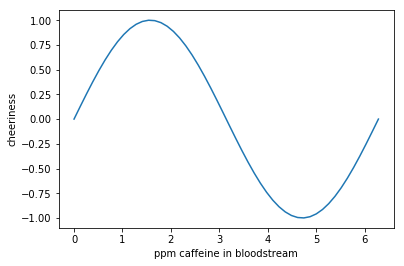

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(0, 2 * np.pi)
plt.plot(x, np.sin(x))
plt.xlabel('ppm caffeine in bloodstream')
plt.ylabel('cheeriness')

and tables...

In [2]:
import astropy.table
tbl = astropy.table.Table()
tbl.add_column(astropy.table.Column(data=np.arange(5),
    name='integers'))
tbl.add_column(astropy.table.Column(data=np.arange(5)**2,
    name='their squares'))
tbl

integers,their squares
int64,int64
0,0
1,1
2,4
3,9
4,16


and even notes and typeset mathematics...

> *And God said:*
>
> > $$\nabla \cdot \mathbf{D} = \rho$$
> > $$\nabla \cdot \mathbf{B} = 0$$
> > $$\nabla \times \mathbf{E} = -\frac{\partial\mathbf{B}}{\partial t}$$
> > $$\nabla \times \mathbf{H} = J + \frac{\partial\mathbf{D}}{\partial t}$$
>
> *and there was light.*

This is all very useful for doing interactive data analysis, so we will use the IPython Notebook interface for this tutorial. **WARNING:** I'm spoiling you rotten by doing this.

## II. How to get Python/Matplotlib/Numpy/Scipy/Astropy

Python and all of the packages that we discuss in this tutorial are open source software, so there multiple options for installing them.

### For Linux/UNIX users

If you have one of the common Linux/UNIX distros (for example, [Ubuntu](https://www.ubuntu.com), [Debian](https://debian.org), or [Fedora](https://fedoraproject.org)), then you probably already have Python and you can get Matplotlib and friends from your package manager.

For example, on Debian or Ubuntu, use:

    $ sudo apt-get install jupyter-notebook python3-matplotlib python3-astropy python3-scipy

### For Mac users

Every version of Mac OS comes with a Python interpreter, but it's slightly easier to obtain Matplotlib and Numpy if you use a package manager such as [MacPorts](https://macports.org), [HomeBrew](https://brew.sh), or [Fink](http://www.finkproject.org). I use MacPorts (and contribute to it, too), so that's what I suggest. Install MacPorts and then do:

    $ sudo port install py37-matplotlib py37-scipy py37-jupyterlab py37-astropy

### For Windows users

Windows does not come with Python, but popular and free builds of Python for Windows include [Anaconda](https://www.anaconda.com/distribution/) and [Canopy](https://www.enthought.com/product/canopy/). Another alternative for Windows is to set up a virtual machine with [VirtualBox](https://www.virtualbox.org) and then install a Linux distribution on that.

## III. Python basics

### The `print()` function and string literals

If this is your first time looking at Python code, the first thing that you might notice is that it is very easy to understand. For example, to print something to the screen, it's just:

In [3]:
print('Hello world!')

Hello world!


This is a Python statement, consisting of the built-in command `print` and a string surrounded by single quotes. Double quotes are fine inside a string:

In [4]:
print('She said, "Hello, world!"')

She said, "Hello, world!"


But if you want single quotes inside your string, you had better delimit it with double quotes:

In [5]:
print("She said, 'Hello, world!'")

She said, 'Hello, world!'


If you need both single quotes and double quotes, you can use backslashes to escape characters.

In [6]:
print('She said, "O brave new world, that has such people in\'t!"')

She said, "O brave new world, that has such people in't!"


If you need a string that contains newlines, use triple quotes (`'''`) or triple double quotes (`"""`):

In [7]:
print("""MIRANDA
  O, wonder!
  How many goodly creatures are there here!
  How beauteous mankind is! O brave new world
  That has such people in't!""")

MIRANDA
  O, wonder!
  How many goodly creatures are there here!
  How beauteous mankind is! O brave new world
  That has such people in't!


Let's say that you need to print a few different things on the same line. Just separate them with commas, as in:

In [8]:
person = 'Miranda'
print("'Tis new to", person)

'Tis new to Miranda


Oops. I'm getting ahead of myself—you've now seen your first variable assignment in Python. Strings can be concatened by adding them:

In [9]:
'abc' + 'def'

'abcdef'

Or repeated by multiplying them:

In [10]:
'abcdef' * 2

'abcdefabcdef'

### Numeric and boolean literals

Python's numeric types include integers and both real and complex floating point numbers:

In [11]:
a = 30 # an integer
b = 0xDEADBEEF # an integer in hexadecimal
c = 3.14159 # a floating point number
d = 5.1e10 # scientific notation
e = 2.5 + 5.3j # a complex number
hungry = True # boolean literal
need_coffee = False # another boolean literal

By the way, all of the text on a given line after the trailing hash sign (`#`) is a comment, ignored by Python.

The arithmetic operators in Python are similar to C, C++, Java, and so on. There is addition (and subtraction):

In [12]:
a + c

33.14159

Multiplication:

In [13]:
a * e

(75+159j)

Division:

In [14]:
a / c

9.549304651466295

But ***beware*** that, like in C, C++, Java, etc., ***division of integers gives you integers***:

In [15]:
7 / 3

2.3333333333333335

If you want true division, convert one or both of the operands to floating point:

In [16]:
a = 7
b = 3
float(a) / b

2.3333333333333335

***NOTE*** that in **Python 3**, division of integers is **true division**.

If you are using Python 2.2 or higher, you can enable true division by putting the following statement at the top of your script:

    from __future__ import division

However, in **both Python 2 and Python 3**, the double-slash operator `//` represents integer division:

In [17]:
7 // 3

2

The `%` sign is the remainder operator:

In [18]:
32 % 26

6

Exponentiation is accomplished with the `**` operator:

In [19]:
print(5 ** 3, 9**-0.5)

125 0.3333333333333333


### Tuples

A tuple is a sequence of values. It's just about the handiest thing since integers. A tuple is immutable: once you have created it, you cannot add items to it, remove items from it, or change items. Tuples are very handy for storing short sequences of related values or returning multiple values from a function. This is what tuples look like:

In [20]:
some_tuple = ('a', 'b', 'c')
another_tuple = ('caffeine', 6.674e-11, 3.14, 2.718)
nested_tuple = (5, 4, 3, 2, ('a', 'b'), 'c')

Once you have made a tuple, you might want to retrieve a value from it. You index a tuple with square brackets, ***starting from zero***:

In [21]:
some_tuple[0]

'a'

In [22]:
some_tuple[1]

'b'

You can access whole ranges of values using ***slice notation***:

In [23]:
nested_tuple[1:4]

(4, 3, 2)

Or, to count backward from the end of the tuple, use a ***negative index***:

In [24]:
another_tuple[-1]

2.718

In [25]:
another_tuple[-2]

3.14

Strings can be treated just like tuples of individual charaters:

In [26]:
person = 'Miranda'
print(person[3:6])

and


### Lists

What if you want a container like a tuple but to which you can add or remove items or alter existing items? That's a list. The syntax is almost the same, except that you create a list using square brackets `[]` instead of round ones `()`:

In [27]:
your_list = ['foo', 'bar', 'bat', 'baz']
my_list = ['xyzzy', 1, 3, 5, 7]

But you can change elements:

In [28]:
my_list[1] = 2
print(my_list)

['xyzzy', 2, 3, 5, 7]


Or append elements to an existing list:

In [29]:
my_list.append(11)
print(my_list)

['xyzzy', 2, 3, 5, 7, 11]


Or delete elements:

In [30]:
del my_list[0]
print(my_list)

[2, 3, 5, 7, 11]


### Sets

Sometimes you need a collection of items where order doesn't necessarily matter, but each item is guaranteed to be unique. That's a set, created just like a list or tuple but with curly braces `{}`:

In [31]:
a = {5, 6, 'foo', 7, 7, 8}
print(a)

{'foo', 5, 6, 7, 8}


You can add items to a set:

In [32]:
a.add(3)
print(a)

{'foo', 3, 5, 6, 7, 8}


Or take them away:

In [33]:
a.remove(3)
print(a)

{'foo', 5, 6, 7, 8}


You also have set-theoretic intersections with the `&` operator:

In [34]:
{1, 2, 3, 4, 5, 6} & {3, 4}

{3, 4}

And union with the `|` operator:

In [35]:
{1, 2, 3, 4, 5, 6} | {6, 7}

{1, 2, 3, 4, 5, 6, 7}

And set difference with the `-` operator:

In [36]:
{1, 2, 3, 4, 5, 6} - {3, 4}

{1, 2, 5, 6}

### Dictionaries

Sometimes, you want a collection that is like a list, but whose indices are strings or other Python values. That's a dictionary. Dictionaries are handy for any type of database-like operation, or for storing mappings from one set of values to another. You create a dictionary by enclosing a list of key-value pairs in curly braces:

In [37]:
my_grb = {'name': 'GRB 130702A', 'redshift': 0.145, 'ra': (14, 29, 14.78), 'dec': (15, 46, 26.4)}
my_grb

{'name': 'GRB 130702A',
 'redshift': 0.145,
 'ra': (14, 29, 14.78),
 'dec': (15, 46, 26.4)}

You can index items in dictionaries with square braces `[]`, similar to tuples or lists:

In [38]:
my_grb['dec']

(15, 46, 26.4)

or add items to them:

In [39]:
my_grb['url'] = 'http://gcn.gsfc.nasa.gov/other/130702A.gcn3'
my_grb

{'name': 'GRB 130702A',
 'redshift': 0.145,
 'ra': (14, 29, 14.78),
 'dec': (15, 46, 26.4),
 'url': 'http://gcn.gsfc.nasa.gov/other/130702A.gcn3'}

or delete items from them:

In [40]:
del my_grb['url']
my_grb

{'name': 'GRB 130702A',
 'redshift': 0.145,
 'ra': (14, 29, 14.78),
 'dec': (15, 46, 26.4)}

Dictionary keys can be any **immutable** kind of Python object: tuples, strings, integers, and floats are all fine. Values in a dictionary can be **any Python value at all**, including lists or other dictionaries:

In [41]:
{
    'foods': ['chicken', 'veggie burger', 'banana'],
    'cheeses': {'muenster', 'gouda', 'camembert', 'mozarella'},
    (5.5, 2): 42,
    'plugh': 'bat'
}

{'foods': ['chicken', 'veggie burger', 'banana'],
 'cheeses': {'camembert', 'gouda', 'mozarella', 'muenster'},
 (5.5, 2): 42,
 'plugh': 'bat'}

### The `None` object

Sometimes you need to represent the absence of a value, for instance, if you have a gap in a dataset. You might be tempted to use some special value like `-1` or `99` for this purpose, but **don't**! Use the built-in object `None`.

In [42]:
a = None

### Conditionals

In Python, control flow statements such as conditionals and loops have blocks indicated with indentation. Any number of spaces or tabs is fine, as long as you are consistent within a block. Common choices include four spaces, two spaces, or a tab.

You can use the `if`...`elif`...`else` statement to have different bits of code run depending on the truth or falsehood of boolean expressions. For example:

In [43]:
a = 5

if a < 3:
    print("i'm in the 'if' block")
    messsage = 'a is less than 3'
elif a == 3:
    print("i'm in the 'elif' block")
    messsage = 'a is 3'
else:
    print("i'm in the 'else' block")
    message = 'a is greater than 3'

print(message)

i'm in the 'else' block
a is greater than 3


You can chain together inequalities just like in mathematical notation:

In [44]:
if 0 < a <= 5:
    print('a is greater than 0 but less than or equal to 5')

a is greater than 0 but less than or equal to 5


You can also combine comparison operators with the boolean `and`, `or`, and `not` operators:

In [45]:
if a < 6 or a > 8:
    print('yahoo!')

yahoo!


In [46]:
if a < 6 and a % 2 == 1:
    print('a is an odd number less than 6!')

a is an odd number less than 6!


In [47]:
if not a == 5: # same as a != 5
    print('a is not 5')

The comparison operator `is` tests whether two Python values are not only equal, but represent the same object. Since there is only one `None` object, the `is` operator is particularly useful for detecting `None`.

In [48]:
food = None

if food is None:
    print('No, thanks')
else:
    print('Here is your', food)

No, thanks


Likewise, there is an `is not` operator:

In [49]:
if food is not None:
    print('Yum!')

The `in` and `not in` operators are handy for testing for membership in a string, set, or dictionary:

In [50]:
if 3 in {1, 2, 3, 4, 5}:
    print('indeed it is')

indeed it is


In [51]:
if 'i' not in 'team':
    print('there is no "i" in "team"')

there is no "i" in "team"


When referring to a dictionary, the `in` operator tests if the item is among the **keys** of the dictionary.

In [52]:
d = {'foo': 3, 'bar': 5, 'bat': 9}
if 'foo' in d:
    print('the key "foo" is in the dictionary')

the key "foo" is in the dictionary


### The `for` and `while` loops

In Python, there are just two types of loops: `for` and `while`. `for` loops are useful for repeating a set of statements for each item in a collection (tuple, set, list, dictionary, or string). `while` loops are not as common, but can be used to repeat a set of statements until a boolean expression becomes false.

In [53]:
for i in [0, 1, 2, 3]:
    print(i**2)

0
1
4
9


The built-in function `range`, which returns a list of numbers, is often handy here:

In [54]:
for i in range(4):
    print(i**2)

0
1
4
9


Or you can have the range start from a nonzero value:

In [55]:
for i in range(-2, 4):
    print(i**2)

4
1
0
1
4
9


You can iterate over the keys and values in a dictionary with `.items()`:

In [56]:
for key, val in d.items():
    print(key, '...', val**3)

foo ... 27
bar ... 125
bat ... 729


The syntax of the `while` loop is similar to the `if` statement:

In [57]:
a = 1
while a < 5:
    a = a * 2
    print(a)

2
4
8


### List comprehensions

Sometimes you need a loop to create one list from another. List comprehensions make this very terse. For example, the following `for` loop:

In [58]:
a = []
for i in range(5):
    a.append(i * 10)

is equivalent to this list comprehension:

In [59]:
a = [i * 10 for i in range(5)]

You can even incorporate conditionals into a list comprehension. The following:

In [60]:
a = []
for i in range(5):
    if i % 2 == 0:
        # i is even
        a.append(i * 10)

can be written as:

In [61]:
a = [i * 10 for i in range(5) if i % 2 == 0]

### Conditional expressions

Conditional expressions are a closely related shorthand. The following:

In [62]:
if 6/2 == 3:
    a = 'foo'
else:
    a = 'bar'

is equivalent to:

In [63]:
a = 'foo' if 6/2 == 3 else 'bar'

### Functions

Functions are created with the `def` statement. A function may either have or not have a `return` statement to send back a return value.

In [64]:
def square(n):
    return n * n

a = square(3)
print(a)

9


If you want to return multiple values from a function, return a tuple. Parentheses around the tuple are optional.

In [65]:
def powers(n):
    return n**2, n**3

print(powers(3))

(9, 27)


If a function returns multiple values, you can automatically unpack them into multiple variables:

In [66]:
square, cube = powers(3)
print(square)

9


If you pass a mutable value such as a list to a function, then **the function may modify that value**. For example, you might implement the Fibonacci sequence like this:

In [67]:
def fibonacci(seed, n):
    while len(seed) < n:
        seed.append(seed[-1] + seed[-2])
    # Note: no return statement

seed = [1, 1]
fibonacci(seed, 10)
print(seed)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


You can also give a function's arguments default values, such as:

In [68]:
def fibonacci(seed, n=6):
    while len(seed) < n:
        seed.append(seed[-1] + seed[-2])
    # Note: no return statement

seed = [1, 1]
fibonacci(seed)
print(seed)

[1, 1, 2, 3, 5, 8]


If a function has a large number of arguments, it may be easier to read if you pass the arguments by keyword, as in:

In [69]:
seq = [1, 1]
fibonacci(seed=seq, n=4)

## IV. The Python standard library

Python comes with an extensive **[standard library](http://docs.python.org/2/library/index.html)** consisting of individual **modules** that you can opt to use with the `import` statement. For example:

In [70]:
import math
math.sqrt(3)

1.7320508075688772

In [71]:
from math import pi
pi

3.141592653589793

Some particularly useful parts of the Python standard library are:

* [`random`](http://docs.python.org/2/library/random.html): random number generators
* [`pickle`](http://docs.python.org/2/library/pickle.html): read/write Python objects into files
* [`sqlite3`](http://docs.python.org/2/library/sqlite3.html): SQLite database acces
* [`os`](http://docs.python.org/2/library/os.html): operating system services
* [`os.path`](http://docs.python.org/2/library/os.path.html): file path manipulation
* [`subprocess`](http://docs.python.org/2/library/subprocess.html): launch external processes
* [`email`](http://docs.python.org/2/library/email.html): compose, parse, receive, or send e-mail
* [`pdb`](http://docs.python.org/2/library/pdb.html): built-in debugger
* [`re`](http://docs.python.org/2/library/re.html): regular expressions
* [`SimpleHTTPServer`](http://docs.python.org/2/library/simplehttpserver.html): built-in lightweight web server
* [`optparse`](http://docs.python.org/2/library/optparse.html): build pretty command-line interfaces
* [`itertools`](http://docs.python.org/2/library/itertools.html): exotic looping constructs
* [`multiprocessing`](https://docs.python.org/2/library/multiprocessing.html): parallel processing

### Error handling

It can be important for your code to be able to handle error conditions. For example, let's say that you are implementing a sinc function:

In [72]:
def sinc(x):
    return math.sin(x) / x

print(sinc(0))

ZeroDivisionError: float division by zero

Oops! We know that by definition $\mathrm{sinc}(0) = 1$ , so we should catch this error:

In [73]:
def sinc(x):
    try:
        result = math.sin(x) / x
    except ZeroDivisionError:
        result = 1
    return result

print(sinc(0))

1
